In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("Datasets/train_values.csv").set_index('building_id')

In [3]:
damages = pd.read_csv("Datasets/train_labels.csv").set_index('building_id')

# Association between superstructure and features

Here I wonder if some superstructures are always associated with certain features. Precisely, I am looking for hidden patterns (civil engineering laws or techniques, relation between superstructure and wealth of residents, etc.)

Superstructure X Superstructure

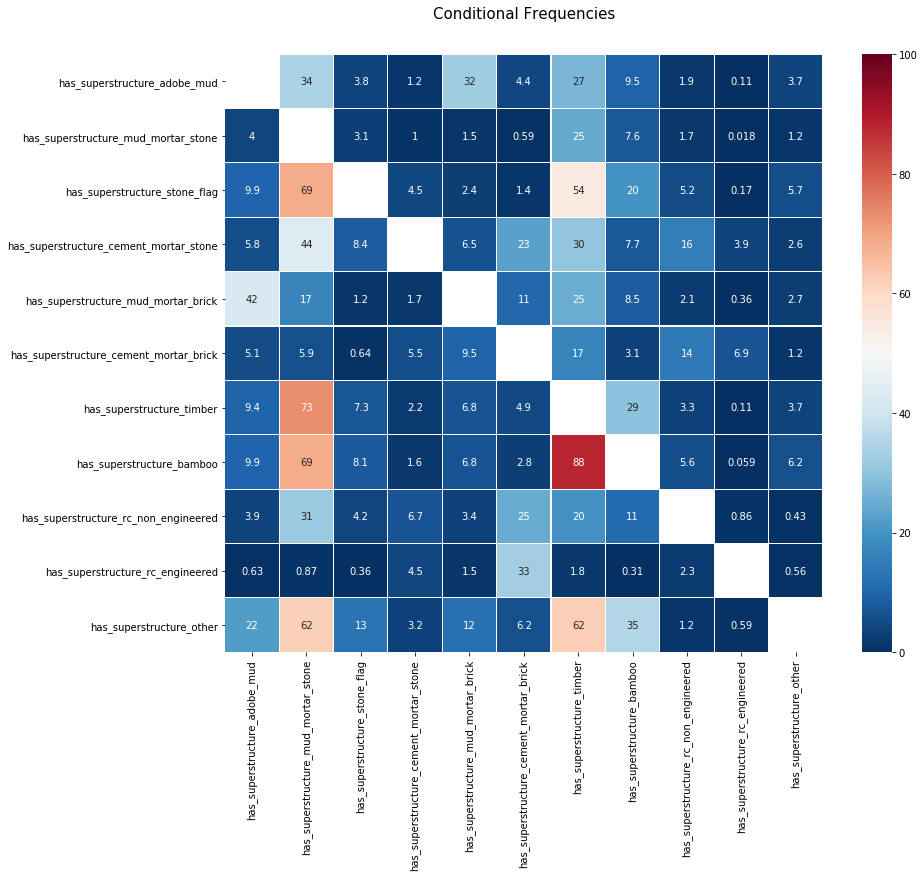

In [4]:
col1 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
col2 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
twins = pd.DataFrame(index=col1, columns=col2)
done = 0
for i in twins.index:
    for c in twins.columns:
        if i !=c :
            twins.loc[i,c] = df[df[i] ==1 ][c].sum()/len(df[df[i] ==1 ])*100
colormap = plt.cm.RdBu_r
mask = np.diag(np.diag(np.ones_like(twins, dtype=np.bool)))
plt.figure(figsize=(14,11))
plt.title('Conditional Frequencies', y=1.05, size=15)
sns.heatmap(twins.fillna(100).astype(float) ,linewidths=0.1, vmax=100, vmin=0, mask=mask,
            square=True, cmap=colormap, linecolor='white', annot=True)

How to read this table : Cell = Freq(row|columns).

For example, 34% of adobe mud superstructures are associated with mud mortar stone, but only 4% of mud mortar stone superstructures are associated with adobe mud.
Unfortunately, it seems that there are no obvious patterns in the association of superstructure : the best we can find is that bamboo is associated 88% of the time with timber. 

Superstructure X Geo level 1 - divided by each geo level

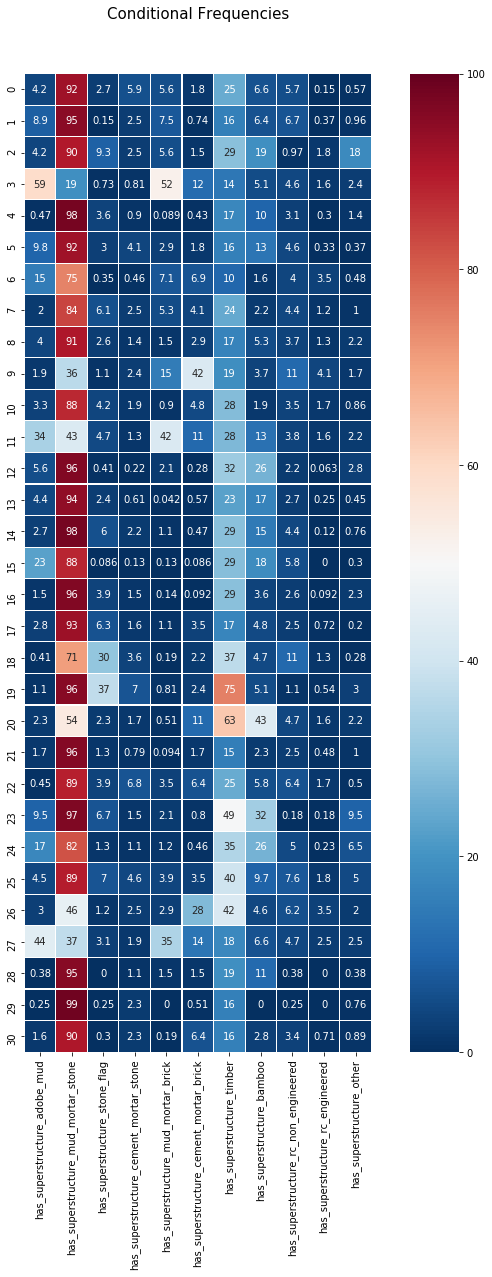

In [5]:
col2 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
col1 = np.sort(df['geo_level_1_id'].unique())
twins = pd.DataFrame(index=col1, columns=col2)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['geo_level_1_id'] == i ][c].sum()/len(df[df['geo_level_1_id'] == i ])*100
colormap = plt.cm.RdBu_r
plt.figure(figsize=(14,18))
plt.title('Conditional Frequencies', y=1.05, size=15)
sns.heatmap(twins.fillna(100).astype(float) ,linewidths=0.1, vmax=100, vmin=0,
            square=True, cmap=colormap, linecolor='white', annot=True)

How to read this table : Cell = Freq(superstructure|geo_level).

Nothing really interesting here.. I already knew that mud mortar stone is very common (76%) so this is not a surprise that it is the most represented in each geo-level ID 1. Apart from this one, no superstructure is a norm in a given geo level ID 1.

Superstructure X Geo level 1 - divided by each superstructure

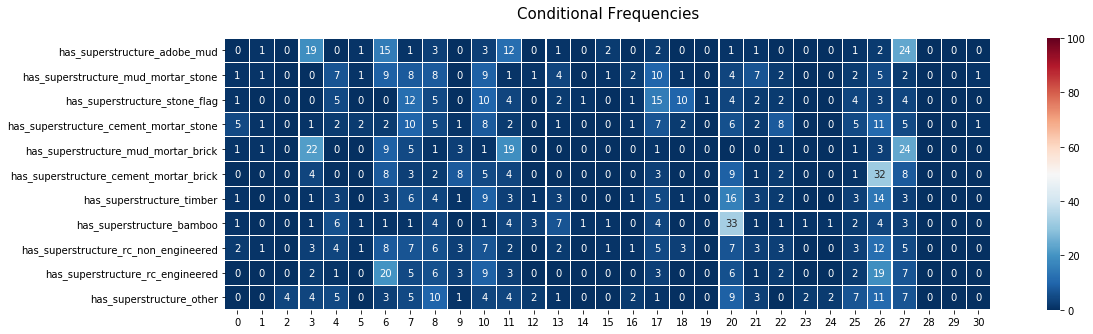

In [6]:
col1 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
col2 = np.sort(df['geo_level_1_id'].unique())
twins = pd.DataFrame(index=col1, columns=col2)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['geo_level_1_id'] == c ][i].sum()/len(df[df[i] == 1 ])*100
colormap = plt.cm.RdBu_r
plt.figure(figsize=(20,5))
plt.title('Conditional Frequencies', y=1.05, size=15)
sns.heatmap(twins.fillna(100).astype(int) ,linewidths=0.1, vmax=100, vmin=0,
            square=True, cmap=colormap, linecolor='white', annot=True)

Same conclusion here : no superstructure is used in a geo level 1 ID exclusively.

Superstructure X Count floors - divided by count floors

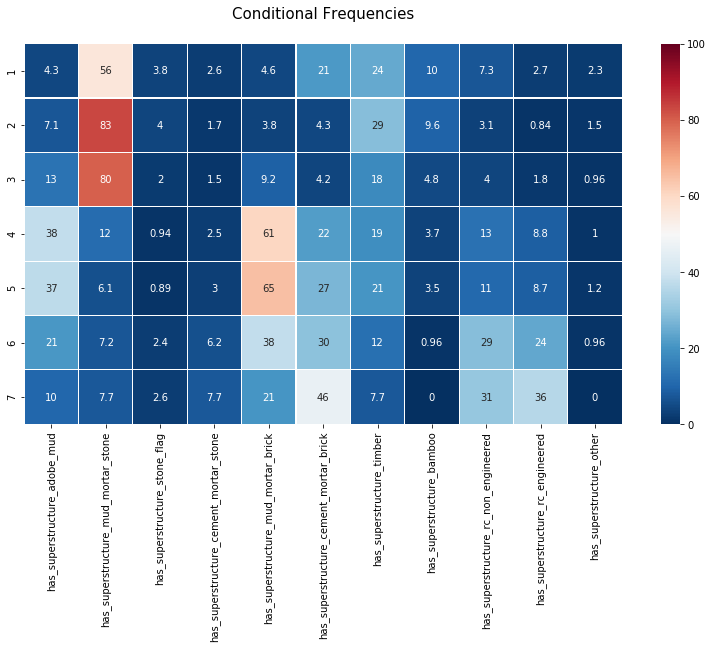

In [7]:
col2 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
col1 = np.sort(df['count_floors_pre_eq'].unique()[:7])
twins = pd.DataFrame(index=col1, columns=col2)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['count_floors_pre_eq'] == i ][c].sum()/len(df[df["count_floors_pre_eq"] == i ])*100
colormap = plt.cm.RdBu_r
plt.figure(figsize=(14,7))
plt.title('Conditional Frequencies', y=1.05, size=15)
sns.heatmap(twins.fillna(100).astype(float) ,linewidths=0.1, vmax=100, vmin=0,
            square=True, cmap=colormap, linecolor='white', annot=True)

How to read this table : Cell = Freq(superstructure|count_floors).

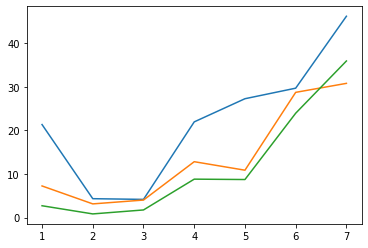

In [8]:
plt.plot(twins["has_superstructure_cement_mortar_brick"])
plt.plot(twins["has_superstructure_rc_non_engineered"])
plt.plot(twins["has_superstructure_rc_engineered"])

Some superstructures are correlated with the number of floors.

Superstructure X Count floors - divided by superstructure

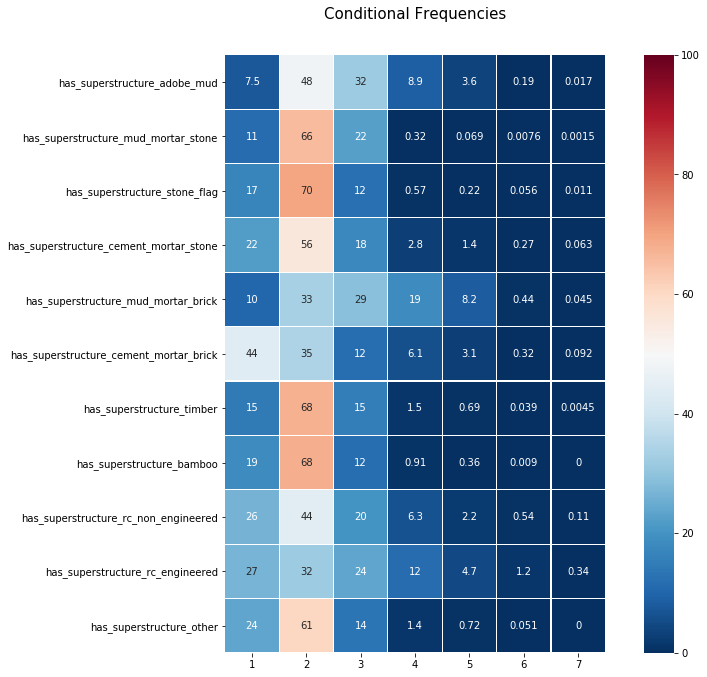

In [9]:
col1 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
col2 = np.sort(df['count_floors_pre_eq'].unique()[:7])
twins = pd.DataFrame(index=col1, columns=col2)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['count_floors_pre_eq'] == c ][i].sum()/len(df[df[i] == 1 ])*100
colormap = plt.cm.RdBu_r
plt.figure(figsize=(14,11))
plt.title('Conditional Frequencies', y=1.05, size=15)
sns.heatmap(twins.fillna(100).astype(float) ,linewidths=0.1, vmax=100, vmin=0,
            square=True, cmap=colormap, linecolor='white', annot=True)

I expected some superstructures to be used only with high-leveled buildings, but it is not the case.

Superstructure X Age - divided by age

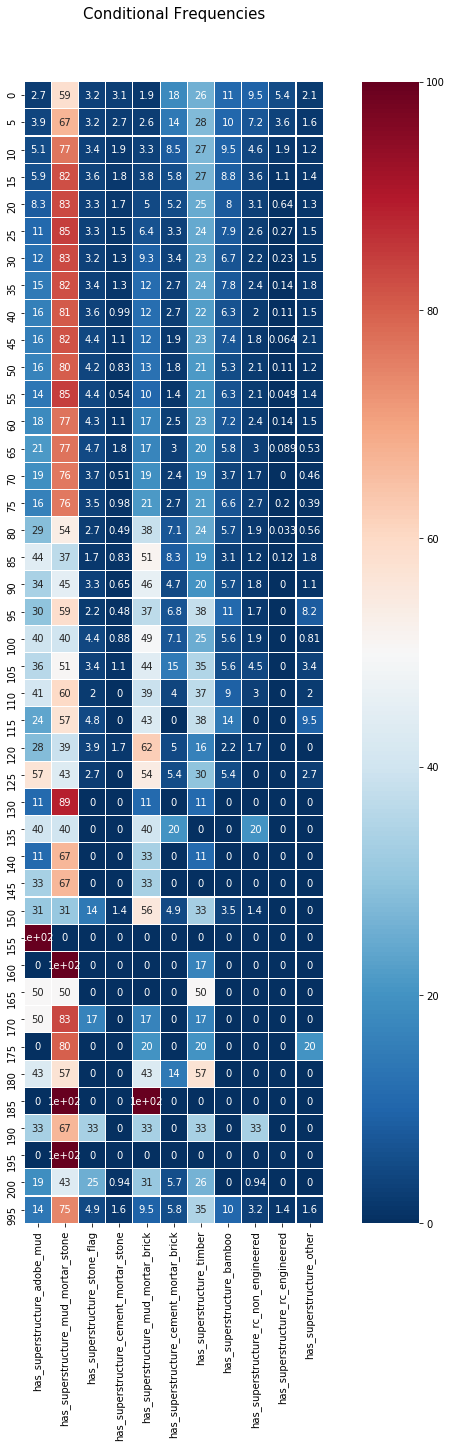

In [10]:
col2 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
col1 = np.sort(df['age'].unique())
twins = pd.DataFrame(index=col1, columns=col2)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['age'] == i ][c].sum()/len(df[df["age"] == i ])*100
colormap = plt.cm.RdBu_r
plt.figure(figsize=(14,21))
plt.title('Conditional Frequencies', y=1.05, size=15)
sns.heatmap(twins.fillna(100).astype(float) ,linewidths=0.1, vmax=100, vmin=0,
            square=True, cmap=colormap, linecolor='white', annot=True)

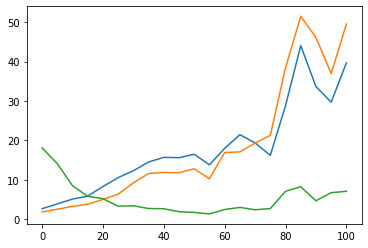

In [11]:
plt.plot(twins.loc[:100,"has_superstructure_adobe_mud"])
plt.plot(twins.loc[:100,"has_superstructure_mud_mortar_brick"])
plt.plot(twins.loc[:100,"has_superstructure_cement_mortar_brick"])

Some superstructures are clearly archaics now - like adobe mud or mud mortar brick - while other are becoming more common.

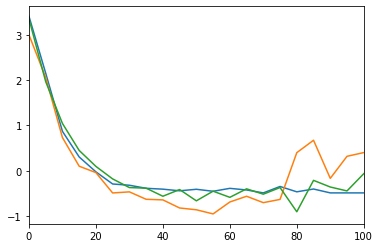

In [12]:
col = "age"
dmgs = df.merge(damages, right_index=True, left_index=True).loc[:,[col,'damage_grade']]
cmap = pd.DataFrame(columns=np.arange(0,105,5), index=np.arange(1,4)).fillna(0)
for i in cmap.columns:
    cmap[i] = dmgs[dmgs[col] == i]['damage_grade'].value_counts().sort_index()/len(dmgs[dmgs[col] == i])
cmap = cmap.T.fillna(0)
expected_value = pd.Series(index=cmap.index)
for i in expected_value.index:
    expected_value.loc[i] = cmap.loc[i,1]+cmap.loc[i,2]*2+cmap.loc[i,3]*3
s1 = twins.loc[:100,"has_superstructure_rc_engineered"]
s1 = (s1 - s1.mean()) / s1.std()
s2 = twins.loc[:100,"has_superstructure_cement_mortar_brick"]
s2 = (s2 - s2.mean()) / s2.std()
s3 = (expected_value.mean() - expected_value) / expected_value.std()
s1.plot()
s2.plot()
s3.plot()

I already knew from previous exploration that RC engineered and cement mortar brick structure are the most resilient - here is an illustration, where percentage of this features per year are highly correlated with expected value of damages. 

Superstructure X Area percentage (binned) - divided by area percentage

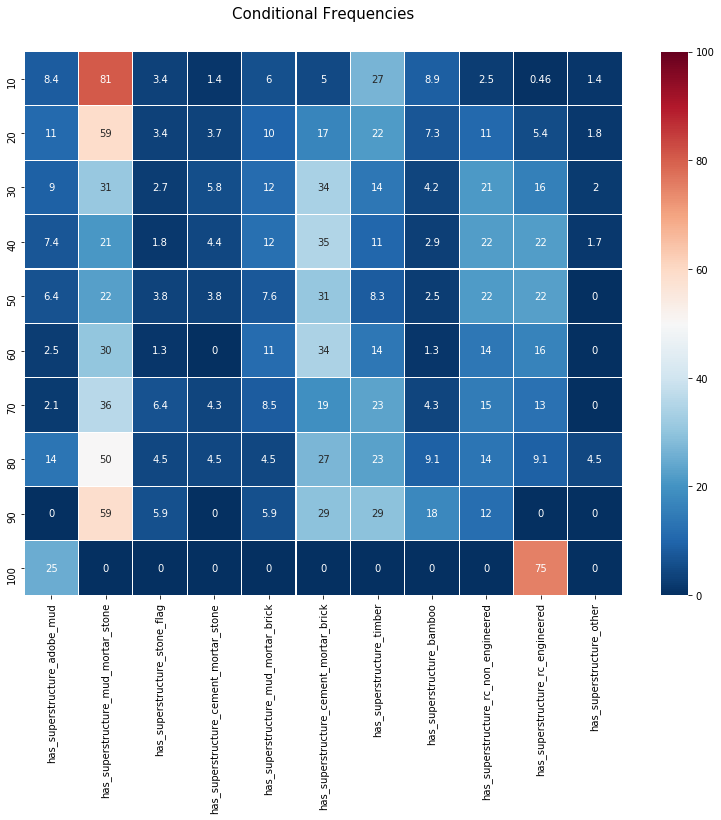

In [13]:
col1 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
twins = pd.DataFrame(index=np.arange(10,110,10), columns=col1)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['area_percentage'].isin(np.arange(i-9,i+1))][c].sum()/len(df[df["area_percentage"].isin(np.arange(i-9,i+1))])*100
colormap = plt.cm.RdBu_r
plt.figure(figsize=(14,10))
plt.title('Conditional Frequencies', y=1.05, size=15)
sns.heatmap(twins.fillna(100).astype(float) ,linewidths=0.1, vmax=100, vmin=0,
            square=True, cmap=colormap, linecolor='white', annot=True)

There is no obvious relation between superstructure and area percentage of buildings

Superstructure X percentage (binned) - divided by height percentage

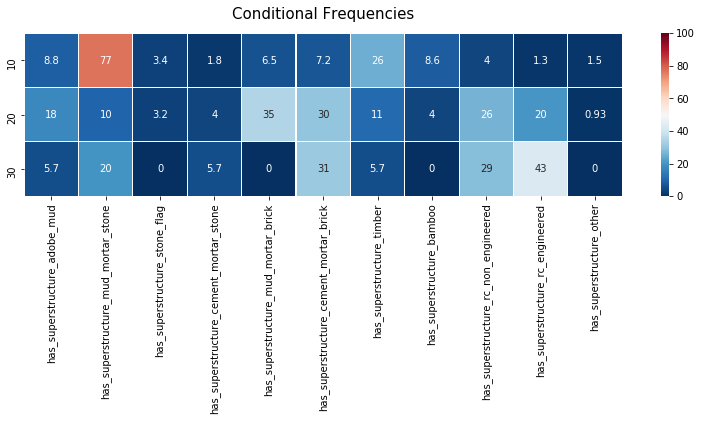

In [14]:
col1 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
twins = pd.DataFrame(index=np.arange(10,40,10), columns=col1)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['height_percentage'].isin(np.arange(i-9,i+1))][c].sum()/len(df[df["height_percentage"].isin(np.arange(i-9,i+1))])*100
colormap = plt.cm.RdBu_r
plt.figure(figsize=(14,3))
plt.title('Conditional Frequencies', y=1.05, size=15)
sns.heatmap(twins.fillna(100).astype(float) ,linewidths=0.1, vmax=100, vmin=0,
            square=True, cmap=colormap, linecolor='white', annot=True)

As expected, higher buildings are most likely to use RC engineered and non-engineered.

Superstructure X Land surface condition  - divided by sufrace condition

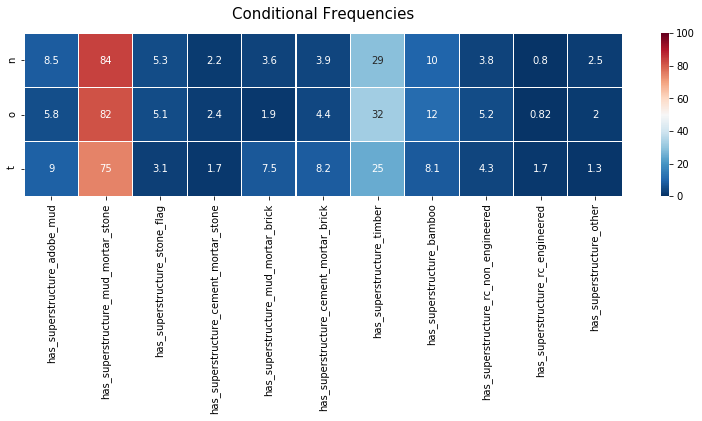

In [15]:
col2 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
col1 = np.sort(df['land_surface_condition'].unique())
twins = pd.DataFrame(index=col1, columns=col2)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['land_surface_condition'] == i ][c].sum()/len(df[df["land_surface_condition"] == i ])*100
colormap = plt.cm.RdBu_r
plt.figure(figsize=(14,3))
plt.title('Conditional Frequencies', y=1.05, size=15)
sns.heatmap(twins.fillna(100).astype(float) ,linewidths=0.1, vmax=100, vmin=0,
            square=True, cmap=colormap, linecolor='white', annot=True)

Each superstructure is quite uniformly distributed in each land surface condition and we can not draw any conclusion out of this tab.

Superstructure X Foundation type  - divided by foundation type

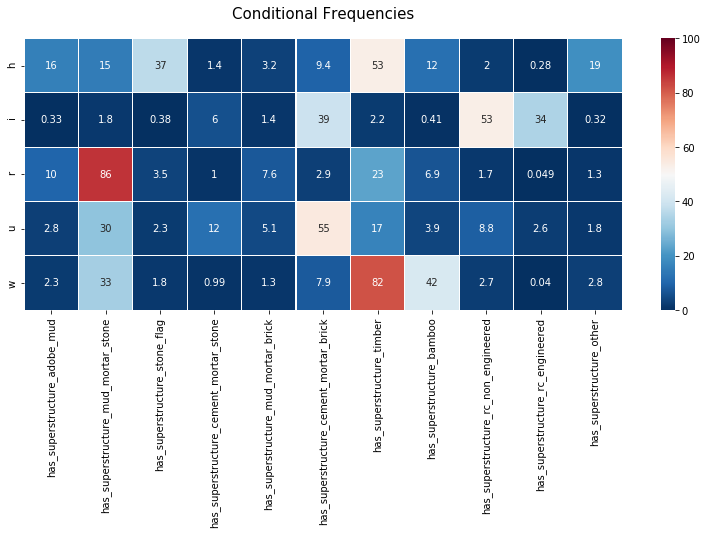

In [16]:
col2 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
col1 = np.sort(df['foundation_type'].unique())
twins = pd.DataFrame(index=col1, columns=col2)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['foundation_type'] == i ][c].sum()/len(df[df["foundation_type"] == i ])*100
colormap = plt.cm.RdBu_r
plt.figure(figsize=(14,5))
plt.title('Conditional Frequencies', y=1.05, size=15)
sns.heatmap(twins.fillna(100).astype(float) ,linewidths=0.1, vmax=100, vmin=0,
            square=True, cmap=colormap, linecolor='white', annot=True)

Foundation type i is used with the best superstructure : cement mortar brick in 39.1% of case, real concrete engineered or non-engineered in at least 53,2% of case.

Superstructure X Roof type  - divided by roof type

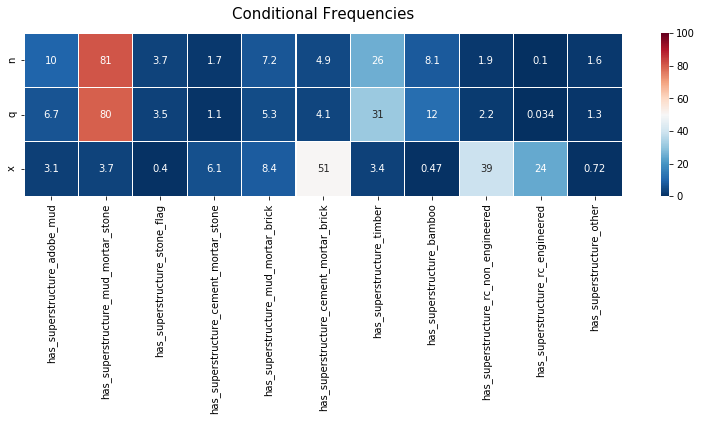

In [17]:
col2 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
col1 = np.sort(df['roof_type'].unique())
twins = pd.DataFrame(index=col1, columns=col2)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['roof_type'] == i ][c].sum()/len(df[df["roof_type"] == i ])*100
colormap = plt.cm.RdBu_r
plt.figure(figsize=(14,3))
plt.title('Conditional Frequencies', y=1.05, size=15)
sns.heatmap(twins.fillna(100).astype(float) ,linewidths=0.1, vmax=100, vmin=0,
            square=True, cmap=colormap, linecolor='white', annot=True)

Roof type x is used with the best superstructure : cement mortar brick in 50.6% of case, real concrete engineered or non-engineered in at least 39.2% of case.

Superstructure X Ground floor type - divided by ground floor type

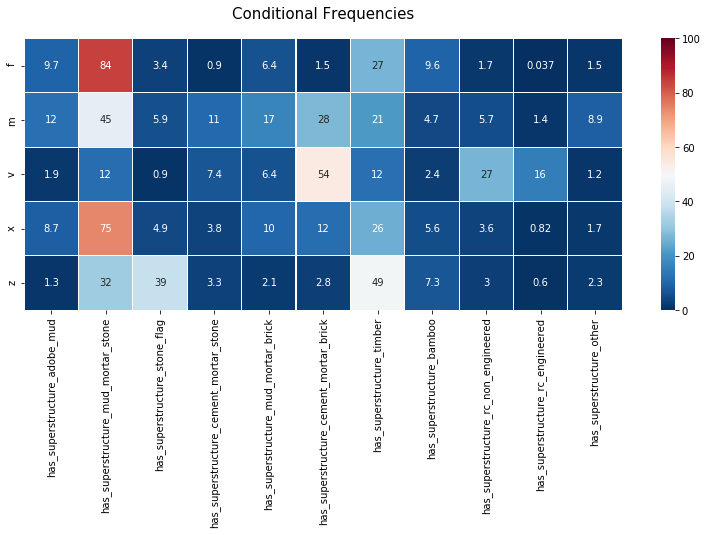

In [18]:
col2 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
col1 = np.sort(df['ground_floor_type'].unique())
twins = pd.DataFrame(index=col1, columns=col2)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['ground_floor_type'] == i ][c].sum()/len(df[df["ground_floor_type"] == i ])*100
colormap = plt.cm.RdBu_r
plt.figure(figsize=(14,5))
plt.title('Conditional Frequencies', y=1.05, size=15)
sns.heatmap(twins.fillna(100).astype(float) ,linewidths=0.1, vmax=100, vmin=0,
            square=True, cmap=colormap, linecolor='white', annot=True)

Ground floor type v is used with the best superstructures : cement mortar brick and real concrete engineered or non-engineered. In the other hand, ground floor type f is associated with the worst superstructures.

Superstructure X Other floor type - divided by other floor type

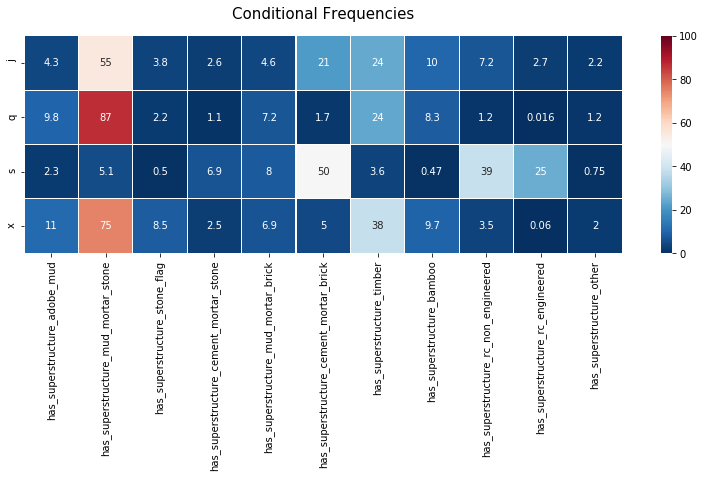

In [19]:
col2 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
col1 = np.sort(df['other_floor_type'].unique())
twins = pd.DataFrame(index=col1, columns=col2)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['other_floor_type'] == i ][c].sum()/len(df[df["other_floor_type"] == i ])*100
colormap = plt.cm.RdBu_r
plt.figure(figsize=(14,4))
plt.title('Conditional Frequencies', y=1.05, size=15)
sns.heatmap(twins.fillna(100).astype(float) ,linewidths=0.1, vmax=100, vmin=0,
            square=True, cmap=colormap, linecolor='white', annot=True)

Superstructure X plan configuration - divided by plan configuration

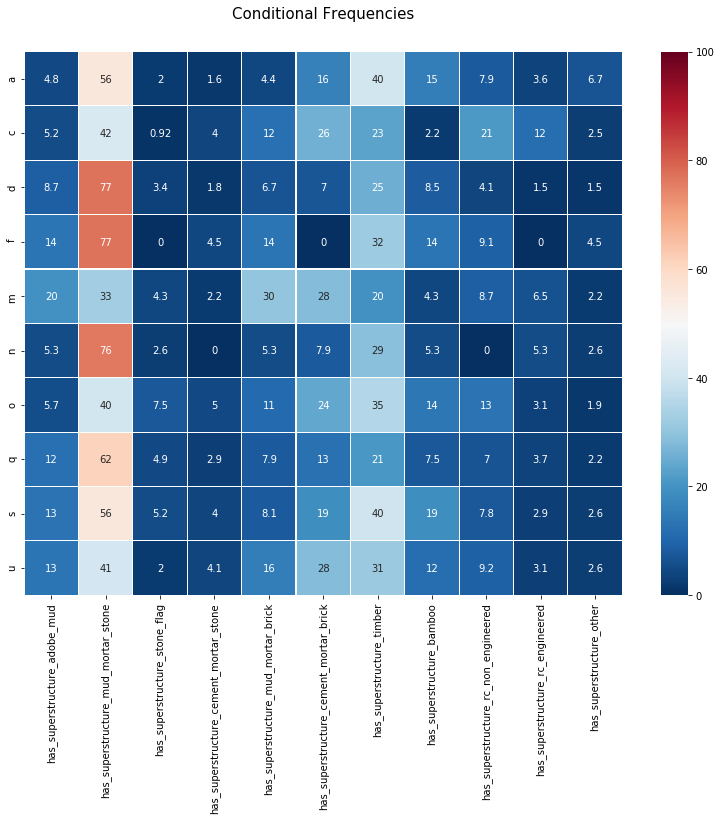

In [20]:
col2 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
col1 = np.sort(df['plan_configuration'].unique())
twins = pd.DataFrame(index=col1, columns=col2)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['plan_configuration'] == i ][c].sum()/len(df[df["plan_configuration"] == i ])*100
colormap = plt.cm.RdBu_r
plt.figure(figsize=(14,10))
plt.title('Conditional Frequencies', y=1.05, size=15)
sns.heatmap(twins.fillna(100).astype(float) ,linewidths=0.1, vmax=100, vmin=0,
            square=True, cmap=colormap, linecolor='white', annot=True)

# Correlation Heatmaps

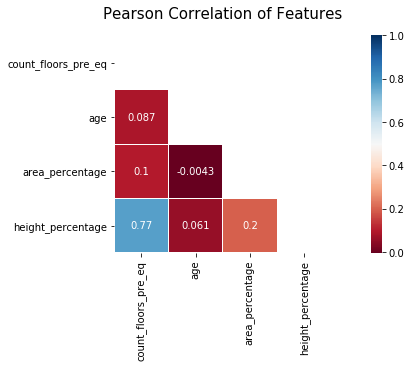

In [21]:
colormap = plt.cm.RdBu
corr = df.iloc[:,3:7].astype(float).corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(14,4))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(corr ,linewidths=0.1,vmax=1.0, mask=mask,
            square=True, cmap=colormap, linecolor='white', annot=True)

No continous variable is strongly correlated to another.

# Principal component analysis

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [23]:
#MinMaxScaler and One hot encoding before performing PCA
scaler = MinMaxScaler(feature_range=(0, 1))
ohe = OneHotEncoder()
dfs = df.drop(columns=['geo_level_2_id','geo_level_3_id'])
for c in dfs.columns[1:5].tolist() + ['count_families']:
    dfs[c] = scaler.fit_transform(dfs[c].values.reshape(-1, 1))
for c in dfs.columns[5:12].tolist() + ['geo_level_1_id', 'legal_ownership_status']:
    encoded = pd.DataFrame(ohe.fit_transform(dfs[c].values.reshape(-1, 1)).toarray(), 
                           index=dfs.index, columns=[c + "_" + str(i) for i in ohe.categories_[0]])
    dfs = dfs.merge(encoded, right_index=True, left_index=True).drop(columns=c)

In [24]:
variance = []
for d in range(1, len(dfs.columns)):
    pca = PCA(n_components=d)
    pca.fit(dfs)
    variance.append(pca.explained_variance_ratio_.sum())

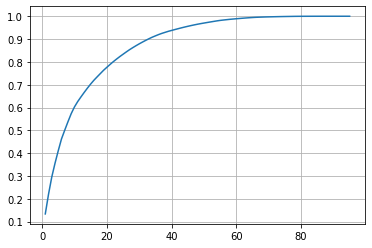

In [25]:
plt.grid()
plt.yticks(np.arange(0,11)/10)
plt.plot(range(1, len(dfs.columns)), variance)

The elbow on this curve is really soft... I won't use the PCA dimensionality reduction unless my computation times are very long.